In [ ]:
from matplotlib.pyplot import imread
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D, Convolution2DTranspose, Add
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras.optimizers as optimizers
#dimension of target image
IMG_HEIGHT = 576
IMG_WIDTH = 720
BATCH_SIZE = 4

#DATA GENERATION
def load_img(path):
    img = imread(path)
    img = img/ 255
    return img

def img_generator(img_list,batch_size):
    while True:
        X_batch_input = []
        y_batch_input = []
        degraded_path =  '/home/fablab/dataset_clean_degraded/degraded/'
        clean_path =  '/home/fablab/dataset_clean_degraded/clean/'
        batch_path = np.random.choice(a = img_list, size= batch_size)
        for img_name in batch_path:
            current_X = load_img(degraded_path+img_name)
            current_y = load_img(clean_path+img_name)
            X_batch_input += [ current_X ]
            y_batch_input += [ current_y ]
        batch_X = np.array(X_batch_input)
        batch_y = np.array(y_batch_input)
        yield (batch_X, batch_y)



#MODEL DEFINITION
FILTER_1 = 64
FILTER_2 = 128
FILTER_3 = 256
model = Sequential()
init = Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
c1 = Convolution2D(FILTER_1, (3, 3), activation='relu', padding='same')(init)
c1 = Convolution2D(FILTER_1, (3, 3), activation='relu', padding='same')(c1)

x = MaxPooling2D((2, 2))(c1)

c2 = Convolution2D(FILTER_2, (3, 3), activation='relu', padding='same')(x)
c2 = Convolution2D(FILTER_2, (3, 3), activation='relu', padding='same')(c2)

x = MaxPooling2D((2, 2))(c2)

c3 = Convolution2D(FILTER_3, (3, 3), activation='relu', padding='same')(x)

x = UpSampling2D()(c3)

c2_2 = Convolution2D(FILTER_2, (3, 3), activation='relu', padding='same')(x)
c2_2 = Convolution2D(FILTER_2, (3, 3), activation='relu', padding='same')(c2_2)

m1 = Add()([c2, c2_2])
m1 = UpSampling2D()(m1)

c1_2 = Convolution2D(FILTER_1, (3, 3), activation='relu', padding='same')(m1)
c1_2 = Convolution2D(FILTER_1, (3, 3), activation='relu', padding='same')(c1_2)

m2 = Add()([c1, c1_2])

decoded = Convolution2D(3, 5, 5, activation='linear', border_mode='same')(m2)

model = Model(init, decoded)
adam = optimizers.Adam(lr=1e-3)
model.compile(optimizer=adam, loss='mse', metrics=['acc'])
model.summary()

#TRAINING
img_list = os.listdir('/home/fablab/dataset_clean_degraded/degraded/')
gen = img_generator(img_list, BATCH_SIZE)

STEPS_PER_EPOCH = np.ceil(5500/BATCH_SIZE)
history = model.fit_generator(gen, steps_per_epoch=STEPS_PER_EPOCH, epochs=3)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:69: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (5, 5), activation="linear", padding="same")`


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 576, 720, 3)  0                                            
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 576, 720, 64) 1792        input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 576, 720, 64) 36928       conv2d_11[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 288, 360, 64) 0           conv2d_12[0][0]                  
__________________________________________________________________________________________________
conv2d_13 

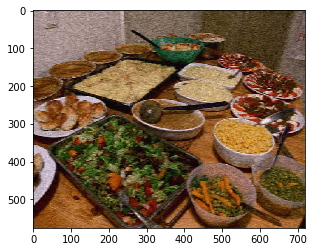

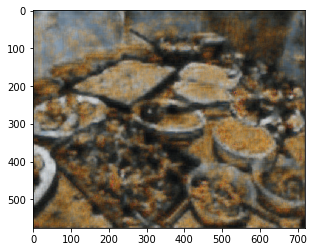

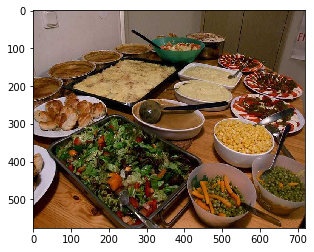

In [34]:
import numpy as np
import matplotlib.pyplot as plt

og_img = plt.imread('C:/Users/Mathieu/CESI/Projet/dataset_clean_degraded/degraded/000000000196.jpg')
og_img = og_img / 255
og_img_clean = plt.imread('C:/Users/Mathieu/CESI/Projet/dataset_clean_degraded/clean/000000000196.jpg')
og_img_clean = og_img_clean / 255
img_to_predict = np.expand_dims(og_img, axis = 0)
predicted_img = model.predict(img_to_predict, batch_size=1)

plt.imshow(og_img)
plt.show()
plt.imshow(predicted_img[0])
plt.show()

plt.imshow(og_img_clean)
plt.show()

In [33]:
import pickle
pickle.dump( model , open( "model-save-pickle-DDSRCNN.p", "wb"))
pickle.dump( history , open( "history-save-pickle-DDSRCNN.p", "wb"))

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()